In [34]:
%pylab inline
import uproot
import awkward as ak
import sys
sys.path.append("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/Preselection/plots_and_tables/")
import plotter
import pandas as pd
import mplhep
plt.style.use(mplhep.style.CMS)
from yahist import Hist1D

Populating the interactive namespace from numpy and matplotlib


In [45]:
#tau_flat_df = pd.read_pickle("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/Preselection/output/singleH_nanoAOD_20210602_singleH_all_with_labels_and_nn_inference.pkl")
tau_flat_df = pd.read_pickle("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/MVAs/flat_higgs_20210602_hidden_200_4_layers_best_save.pkl")

### Distribution of gen higgs masses after preselection (all tags - train, val, test)

In [36]:
tau_flat_df.columns

Index(['gg_mass', 'nJet', 'MET_pt', 'MET_phi', 'diphoton_pt_mgg',
       'diphoton_rapidity', 'diphoton_delta_R', 'lead_pho_ptmgg',
       'sublead_pho_ptmgg', 'lead_pho_eta', 'sublead_pho_eta',
       'lead_pho_idmva', 'sublead_pho_idmva', 'lead_pho_phi',
       'sublead_pho_phi', 'ele1_pt', 'ele1_eta', 'ele1_phi', 'ele2_pt',
       'ele2_eta', 'ele2_phi', 'ele1_tightId', 'ele2_tightId', 'muon1_pt',
       'muon1_eta', 'muon1_phi', 'muon2_pt', 'muon2_eta', 'muon2_phi',
       'muon1_tightId', 'muon2_tightId', 'tau1_pt', 'tau1_eta', 'tau1_phi',
       'tau2_pt', 'tau2_eta', 'tau2_phi', 'tau1_id_vs_e', 'tau1_id_vs_m',
       'tau1_id_vs_j', 'tau2_id_vs_e', 'tau2_id_vs_m', 'tau2_id_vs_j', 'n_tau',
       'n_electrons', 'n_muons', 'jet1_pt', 'jet1_eta', 'jet1_id',
       'jet1_bTagDeepFlavB', 'jet2_pt', 'jet2_eta', 'jet2_id',
       'jet2_bTagDeepFlavB', 'pt_tautauSVFitLoose', 'eta_tautauSVFitLoose',
       'phi_tautauSVFitLoose', 'm_tautauSVFitLoose', 'dR_tautauSVFitLoose',
       'dR_gg

In [16]:
gen_hist = Hist1D(tau_flat_df["gen_higgs_mass"].values, bins = np.arange(80, 145, 1))
nn_hist_no_l2 = Hist1D(tau_flat_df["nn_ditau_mass_no_l2"].values, bins = np.arange(80, 145, 1))
nn_hist_l2_0p5 = Hist1D(tau_flat_df["nn_ditau_mass_l20p5"].values, bins = np.arange(80, 145, 1))

<AxesSubplot:>

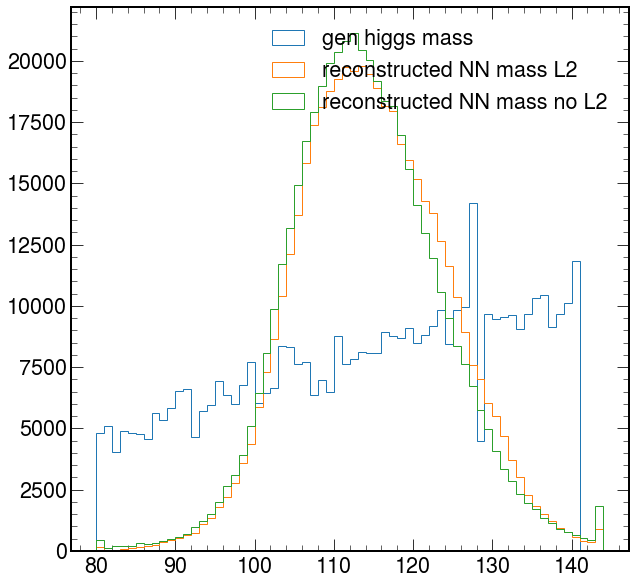

In [17]:
plt.subplots(1,1)

gen_hist.plot(label = "gen higgs mass")
nn_hist_l2_0p5.plot(label = "reconstructed NN mass L2")
nn_hist_no_l2.plot(label = "reconstructed NN mass no L2")

In [18]:
gen_hist_val = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "gen_higgs_mass"].values, bins = np.arange(80, 145, 5))
nn_hist_val = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "nn_ditau_mass"].values, bins = np.arange(80, 145, 5))

plt.subplots(1,1)

gen_hist_val.plot(label = "gen higgs mass")
nn_hist_val.plot(label = "reconstructed NN mass")

KeyError: 'nn_ditau_mass'

In [ ]:
tau_flat_df["gen_higgs_mass"].unique()

In [ ]:
tau_flat_df.loc[tau_flat_df["gen_higgs_mass"] != tau_flat_df["gen_higgs_mass"].astype(int32), "gen_higgs_mass"]

In [ ]:
tau_flat_df["gen_higgs_mass"].astype(int32)

In [6]:
tau_training_set = pd.read_pickle("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/Preselection/output/singleH_nanoAOD_20210602_singleH_all.pkl")

In [7]:
tau_training_set["gen_higgs_mass"].unique()

array([100.  , 101.  , 102.  , 103.  , 104.  , 103.75, 105.  , 105.25,
       106.  , 107.  , 108.  , 107.75, 109.  , 110.  , 109.75, 111.  ,
       112.  , 113.  , 113.25, 114.  , 115.  , 116.  , 117.  , 116.75,
       118.  , 119.  , 120.  , 121.  , 122.  , 122.25, 123.  , 124.  ,
       125.  , 125.25, 126.  , 126.25, 127.  , 126.75, 128.  , 127.75,
       129.  , 130.  , 131.  , 132.  , 133.  , 134.  , 135.  , 136.  ,
       137.  , 138.  , 139.  , 140.  ,  80.  ,  81.  ,  82.  ,  83.  ,
        84.  ,  85.  ,  86.  ,  85.75,  87.  ,  88.  ,  89.  ,  90.  ,
        91.  ,  92.  ,  93.  ,  94.  ,  93.75,  95.  ,  96.  ,  97.  ,
        98.  ,  99.  , 115.25, 104.75, 112.75, 118.25, 119.75, 120.75,
       123.25,  82.25,  83.75,  84.75,  94.75,  96.25], dtype=float32)

In [39]:
tau_flat_df["genZ_decayMode"]

Index(['gg_mass', 'nJet', 'MET_pt', 'MET_phi', 'diphoton_pt_mgg',
       'diphoton_rapidity', 'diphoton_delta_R', 'lead_pho_ptmgg',
       'sublead_pho_ptmgg', 'lead_pho_eta', 'sublead_pho_eta',
       'lead_pho_idmva', 'sublead_pho_idmva', 'lead_pho_phi',
       'sublead_pho_phi', 'ele1_pt', 'ele1_eta', 'ele1_phi', 'ele2_pt',
       'ele2_eta', 'ele2_phi', 'ele1_tightId', 'ele2_tightId', 'muon1_pt',
       'muon1_eta', 'muon1_phi', 'muon2_pt', 'muon2_eta', 'muon2_phi',
       'muon1_tightId', 'muon2_tightId', 'tau1_pt', 'tau1_eta', 'tau1_phi',
       'tau2_pt', 'tau2_eta', 'tau2_phi', 'tau1_id_vs_e', 'tau1_id_vs_m',
       'tau1_id_vs_j', 'tau2_id_vs_e', 'tau2_id_vs_m', 'tau2_id_vs_j', 'n_tau',
       'n_electrons', 'n_muons', 'jet1_pt', 'jet1_eta', 'jet1_id',
       'jet1_bTagDeepFlavB', 'jet2_pt', 'jet2_eta', 'jet2_id',
       'jet2_bTagDeepFlavB', 'pt_tautauSVFitLoose', 'eta_tautauSVFitLoose',
       'phi_tautauSVFitLoose', 'm_tautauSVFitLoose', 'dR_tautauSVFitLoose',
       'dR_gg

In [46]:
tau_flat_df = pd.read_pickle("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/MVAs/nn_ditau_mass.pkl")

In [47]:
tau_flat_df_early_stop = pd.read_pickle("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/MVAs/flat_higgs_20210602_hidden_200_4_layers_best_save.pkl")

In [50]:
gen_hist = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "gen_higgs_mass"].values, bins = np.arange(80, 145, 1))
nn_hist = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "nn_ditau_mass"].values, bins = np.arange(80, 145, 1))
nn_hist_early_stop = Hist1D(tau_flat_df_early_stop.loc[tau_flat_df["train_label"] == 2, "nn_ditau_mass_no_l2"].values, bins = np.arange(80, 145, 1))

<AxesSubplot:>

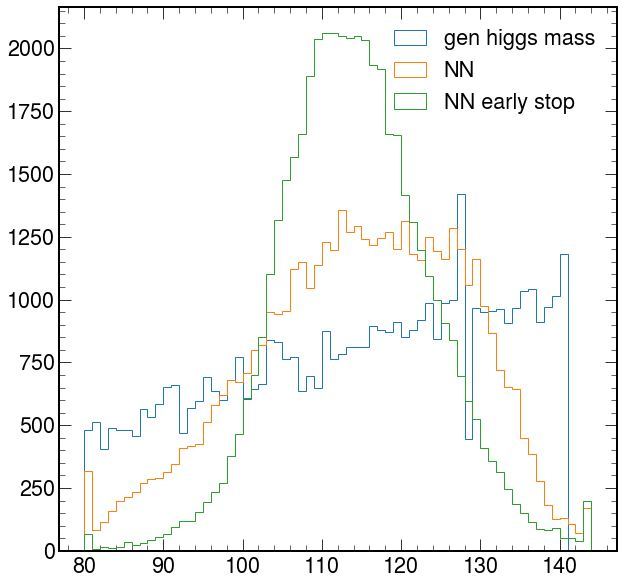

In [51]:
plt.subplots(1,1)

gen_hist.plot(label = "gen higgs mass")
nn_hist.plot(label = "NN")
nn_hist_early_stop.plot(label = "NN early stop")

In [54]:
tau_flat_df = pd.read_pickle("/home/users/bsathian/HHggTauTau/centralRepo/HggAnalysisDev/MVAs/flat_higgs_20210602_higgs_200_4_layers.pkl")
gen_hist = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "gen_higgs_mass"].values, bins = np.arange(80, 145, 1))
nn_hist = Hist1D(tau_flat_df.loc[tau_flat_df["train_label"] == 2, "nn_ditau_mass"].values, bins = np.arange(80, 145, 1))


<AxesSubplot:>

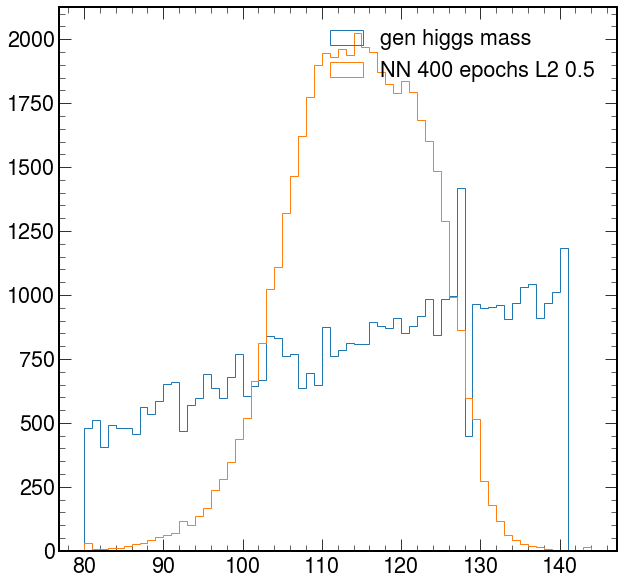

In [56]:
plt.subplots(1,1)

gen_hist.plot(label = "gen higgs mass")
nn_hist.plot(label = "NN 400 epochs L2 0.5")